# Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data loading

In [2]:
df_client = pd.read_csv('client_data.csv')
df_price = pd.read_csv('price_data.csv')

# Exploratory Data Analysis

## Data type

In [3]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The datatype of date_activ, date_end, date_modif_prod and date_renewal is object, so we need to convert them to datetime.


In [4]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

for i in date:
    df_client[i] = pd.to_datetime(df_client[i])

In [5]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


The datatype of price_date is object, so we need to convert to datetime.


In [7]:
df_price['price_date']=pd.to_datetime(df_price['price_date'])

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


## Statistics

In [9]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [10]:
df_price.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


## Missing values

In [11]:
df_client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [12]:
df_price.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

## Duplicates

In [13]:
client_duplicate = df_client.duplicated().sum()
client_duplicate

0

In [14]:
price_duplicate = df_price.duplicated().sum()
price_duplicate

0

## Hypotesis investigation

In [15]:
categorical_columns = df_client.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_client.select_dtypes(include=np.number).columns.tolist()

In [17]:
from scipy.stats import chi2_contingency

# categorical

result_list = []

for column in categorical_columns:
    crosstab = pd.crosstab(df_client[column], df_client['churn'])
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    result_list.append({
        'Column': column,
        'Chi square': chi2,
        'P-value': p_value
    })

chi_square_result = pd.DataFrame(result_list)
chi_square_result

,Column,Chi square,P-value
0,id,14606.000000,4.961097e-01
1,channel_sales,103.784495,1.781065e-19
2,has_gas,8.427560,3.695759e-03
3,origin_up,141.337138,9.298626e-29


From the chi-square test results, it can be concluded that the features "channel_sales," "has_gas," and "origin_up" have a significant correlation with the target feature "churn." Meanwhile, the feature "id" does not show a significant correlation with churn and may not have much influence in predicting the likelihood of customer churn.

In [18]:
# Menghitung korelasi antara variabel numerik dengan variabel target
correlation_results = df_client[numerical_columns + ['churn']].corr()['churn'].drop('churn')

# Menjadikan dataframe
correlation_df_client = pd.DataFrame(correlation_results)
correlation_df_client



,churn,churn
cons_12m,-0.045968,-0.045968
cons_gas_12m,-0.037957,-0.037957
cons_last_month,-0.045284,-0.045284
forecast_cons_12m,0.012949,0.012949
forecast_cons_year,-0.002558,-0.002558
forecast_discount_energy,0.017026,0.017026
forecast_meter_rent_12m,0.044245,0.044245
forecast_price_energy_off_peak,-0.010837,-0.010837
forecast_price_energy_peak,0.029315,0.029315
forecast_price_pow_off_peak,0.014778,0.014778


Features with negative correlation to "churn":

- cons_12m: Weak negative correlation indicates that the higher the electricity consumption in the last 12 months, the lower the likelihood of churn.

- cons_gas_12m: Weak negative correlation indicates that the higher the gas consumption in the last 12 months, the lower the likelihood of churn.

- cons_last_month: Weak negative correlation indicates that the higher the electricity consumption in the last month, the lower the likelihood of churn.

- num_years_antig: Moderate negative correlation indicates that the longer a customer has been a client, the lower the likelihood of churn.

Features with positive correlation to "churn":

- forecast_cons_12m: Weak positive correlation indicates that the higher the forecasted electricity consumption for the next 12 months, the higher the likelihood of churn.

- forecast_discount_energy: Weak positive correlation indicates that the higher the forecasted current discount, the higher the likelihood of churn.

- forecast_meter_rent_12m: Weak positive correlation indicates that the higher the forecasted bill of meter rental for the next 12 months, the higher the likelihood of churn.

- forecast_price_energy_peak: Weak positive correlation indicates that the higher the forecasted energy price during peak period, the higher the likelihood of churn.

- margin_gross_pow_ele: Strong positive correlation indicates that the higher the gross margin on power subscription, the higher the likelihood of churn.

- margin_net_pow_ele: Strong positive correlation indicates that the higher the net margin on power subscription, the higher the likelihood of churn.

- pow_max: Weak positive correlation indicates that the higher the subscribed power, the higher the likelihood of churn.

In [19]:
churn_price = pd.merge(df_price, df_client[['id', 'churn']], on='id', how='inner')


In [20]:
numerical_columns_price = churn_price.select_dtypes(include=np.number).columns.tolist()

In [21]:
correlation_results_price = churn_price[numerical_columns_price + ['churn']].corr()['churn'].drop('churn')
correlation_results_price

,churn,churn
price_off_peak_var,-0.006075,-0.006075
price_peak_var,0.029314,0.029314
price_mid_peak_var,0.046120,0.046120
price_off_peak_fix,0.016643,0.016643
price_peak_fix,0.046852,0.046852
price_mid_peak_fix,0.044446,0.044446


Based on the correlation results, the features that have a significant correlation with "churn" are price_mid_peak_var, price_peak_fix, and price_mid_peak_fix.

## Visualization

Count: churn
0    13187
1     1419
Name: count, dtype: int64


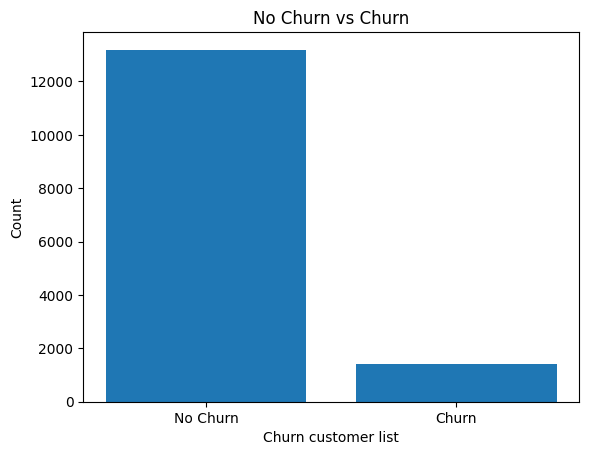

In [31]:
# count
status_count = df_client['churn'].value_counts()
print('Count:', status_count)

# Visualisasi perbandingan jumlah data
plt.bar(status_count.index, status_count.values)
plt.xlabel('Churn customer list')
plt.ylabel('Count')

# Atur label sumbu x
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Atur judul dan sumbu y
plt.title('No Churn vs Churn')
plt.ylabel('Count')

plt.show()

Based on the total available data, there are 13,187 customer records that did not churn (they continued using the company's products or services), and 1,419 customer records that churned (they stopped using the company's products or services).

With this information, the company can realize that approximately 1,419 customers have churned. This indicates a potential issue in customer retention, and the company needs to take steps to reduce churn to avoid losing more customers in the future.

Further analysis and appropriate preventive actions can be taken based on this data to enhance customer satisfaction, identify the reasons for customer churn, and design more effective retention strategies to retain existing customers.

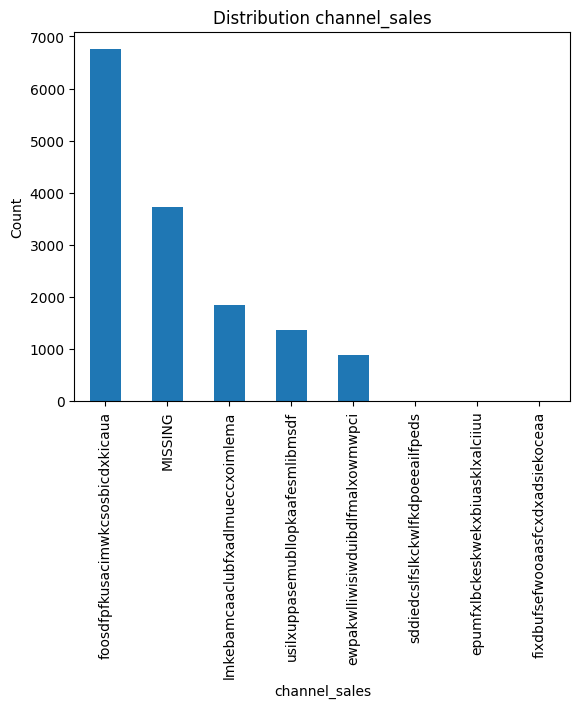

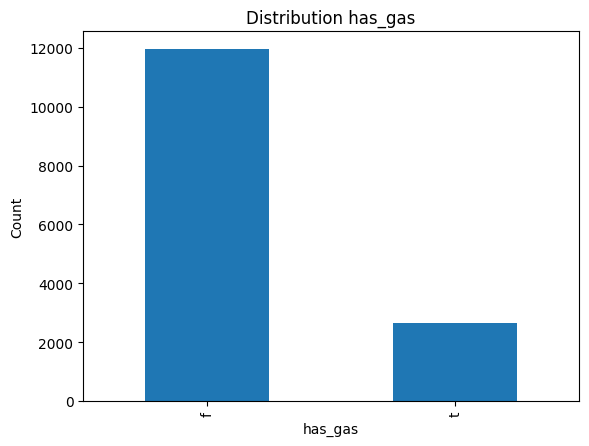

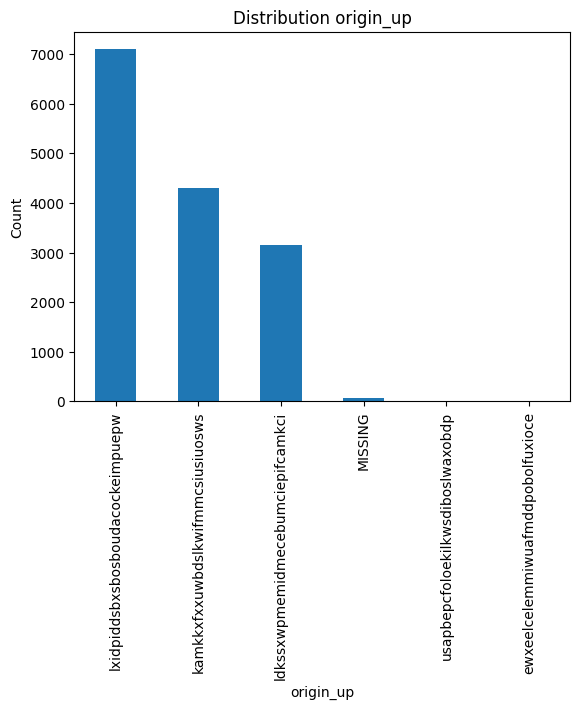

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

has_gas
f    11955
t     2651
Name: count, dtype: int64

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64



In [32]:
# Check the visualization of the distribution of correlated category features
corelation_categorical_columns = ['channel_sales', 'has_gas', 'origin_up']

# Distribution visualization
for column in corelation_categorical_columns:
    plt.figure()
    df_client[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Category count check
for column in corelation_categorical_columns:
    print(df_client[column].value_counts())
    print()

Channel Sales:

There are several different categories of channel sales, and most customers are registered under one of these categories. The category "foosdfpfkusacimwkcsosbicdxkicaua" has the highest number of customers.
The chi-square analysis results indicate a significant correlation between the channel sales feature and churn.
This means that the choice of channel sales can influence the customer churn rate. The company needs to conduct further analysis to understand why some channel sales categories are more effective in retaining customers than others and utilize these findings to improve marketing and retention strategies.

Has Gas:

The majority of customers (11,955) do not have gas service (the "has_gas" feature has a value of "f"), while a small number of customers (2,651) have gas service (the "has_gas" feature has a value of "t").
The chi-square analysis shows a significant correlation between the has_gas feature and churn.
The company needs to investigate further why customers with gas service tend to have a higher churn risk than customers without gas service. Specific strategies can be implemented to retain customers with gas service and enhance their satisfaction.

Origin Up:

There are several categories of the first electricity campaign code that customers followed when they first subscribed to the company's products or services.
The category "lxidpiddsbxsbosboudacockeimpuepw" has the highest number of customers.
The chi-square analysis indicates a highly significant correlation between the origin_up feature and churn.
The first campaign code chosen by customers apparently can impact their decision to churn or remain as customers. The company needs to gain a deeper understanding of the impact of each previous marketing campaign to design more effective marketing strategies in the future.

In [24]:
# Calculates the frequency of occurrence of each combination of channel_sales and churn
chanel_churn_freq = df_client.groupby(['has_gas', 'churn']).size().reset_index(name='count')
# Create pivot table to format data
chanel_churn_pivot = chanel_churn_freq.pivot(index='has_gas', columns='churn', values='count').fillna(0)

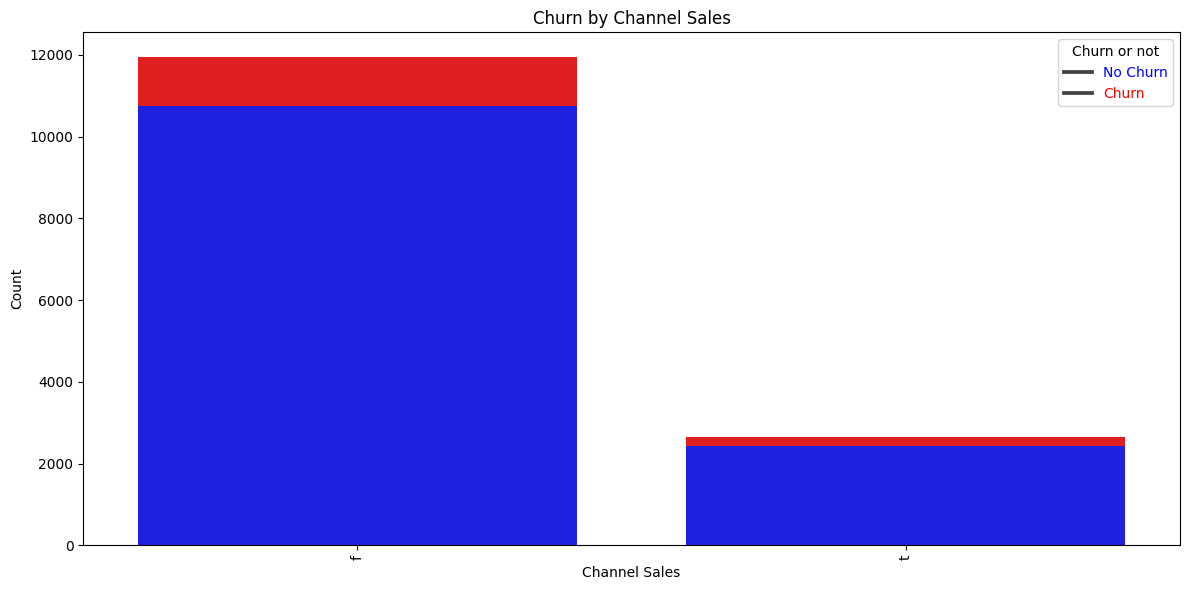

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=chanel_churn_pivot.index, y=chanel_churn_pivot[0], color='b', label='Churn 0')
sns.barplot(x=chanel_churn_pivot.index, y=chanel_churn_pivot[1], color='r', bottom=chanel_churn_pivot[0], label='Churn 1')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.title('Churn by Channel Sales')
plt.xticks(rotation=90)
legend = plt.legend(title='Churn or not', loc='upper right', labels=['No Churn', 'Churn'])
legend.get_texts()[0].set_color('blue')  
legend.get_texts()[1].set_color('red') 
plt.tight_layout()
plt.show()


The best recommendation based on this data is to focus on the "foosdfpfkusacimwkcsosbicdxkicaua" and "MISSING" channel sales. The "foosdfpfkusacimwkcsosbicdxkicaua" channel sales have the highest number of non-churning customers, but it also has a significant number of churning customers. Therefore, further analysis is needed to understand the factors causing churn in this channel sales and take appropriate actions to minimize churn.

Additionally, the "MISSING" channel sales also have a high number of non-churning customers, but it also has a significant number of churning customers. Further investigation is needed to understand why this channel sales has a high number of churning customers and take steps to improve customer retention.

An example of implementing these recommendations is to conduct further analysis regarding the factors influencing churn in the "foosdfpfkusacimwkcsosbicdxkicaua" and "MISSING" channel sales. For instance, customer surveys can be conducted to understand their needs and satisfaction, and competitor analysis can be performed to understand why customers choose to switch to competitors. Based on the analysis results, actions can be taken, such as improving service quality, offering special deals to loyal customers, or enhancing communication with customers to minimize churn.

In [27]:
# Menghitung frekuensi kemunculan setiap kombinasi channel_sales dan churn
gas_churn_freq = df_client.groupby(['has_gas', 'churn']).size().reset_index(name='count')
# Membuat tabel pivot untuk memformat data
gas_churn_pivot = gas_churn_freq.pivot(index='has_gas', columns='churn', values='count').fillna(0)

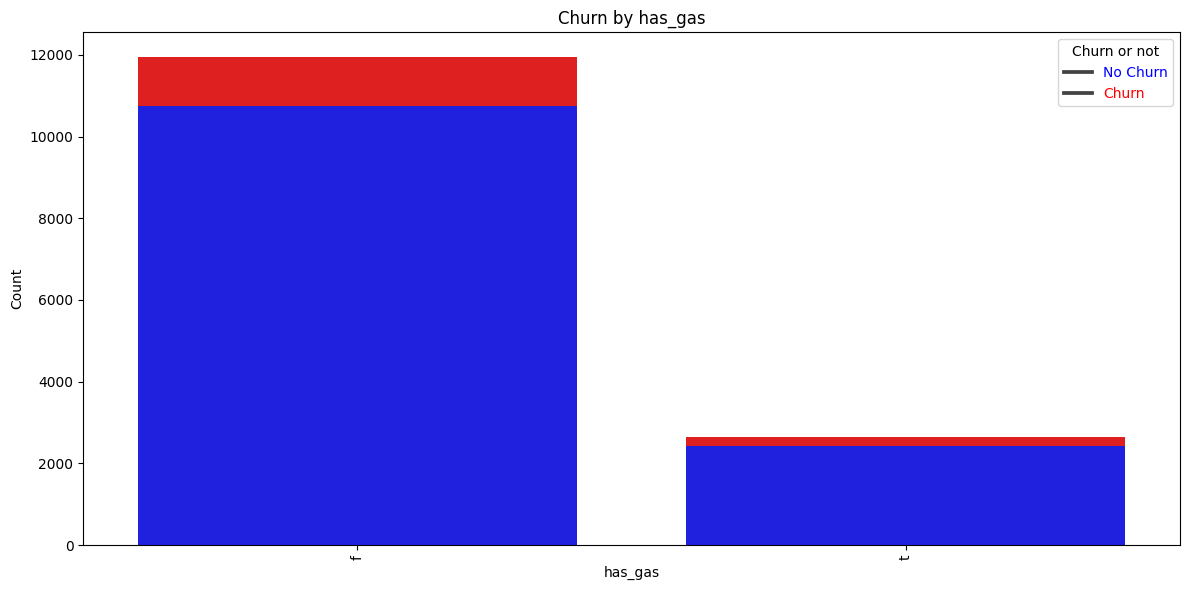

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=gas_churn_pivot.index, y=gas_churn_pivot[0], color='b', label='Churn 0')
sns.barplot(x=gas_churn_pivot.index, y=gas_churn_pivot[1], color='r', bottom=gas_churn_pivot[0], label='Churn 1')
plt.xlabel('has_gas')
plt.ylabel('Count')
plt.title('Churn by has_gas')
plt.xticks(rotation=90)
legend = plt.legend(title='Churn or not', loc='upper right', labels=['No Churn', 'Churn'])
legend.get_texts()[0].set_color('blue')  
legend.get_texts()[1].set_color('red')  
plt.tight_layout()
plt.show()


The best recommendation based on this analysis is to pay attention to customers who have gas subscriptions, as they have a higher churn rate. Some steps that can be taken to reduce churn among customers with gas subscriptions include:

- Improving service quality: The company can ensure that technicians are equipped with necessary tools to perform routine maintenance on customers' gas installations. Additionally, the company can monitor the gas quality regularly and provide reports to customers to ensure that the gas they receive is safe and of high quality.

- Customer retention programs: The company can launch customer retention programs specifically targeted at customers with gas subscriptions. These programs can include monthly discount offers, rewards after customers reach a certain period without churn, or other special offers that are relevant to the customers' needs.

- Effective communication: The company can send monthly newsletters to customers with gas subscriptions, containing up-to-date information about products, services, and special offers. Additionally, the company can provide easily accessible communication channels, such as 24/7 customer service or a mobile application that allows customers to contact the company easily.

By implementing these steps, the company can improve customer satisfaction, increase loyalty among customers with gas subscriptions, and ultimately reduce churn in this segment.

In [29]:
# Calculates the frequency of occurrence of each combination of origin_up and churn
origin_churn_freq = df_client.groupby(['origin_up', 'churn']).size().reset_index(name='count')
# Create pivot table to format data
origin_churn_pivot = origin_churn_freq.pivot(index='origin_up', columns='churn', values='count').fillna(0)

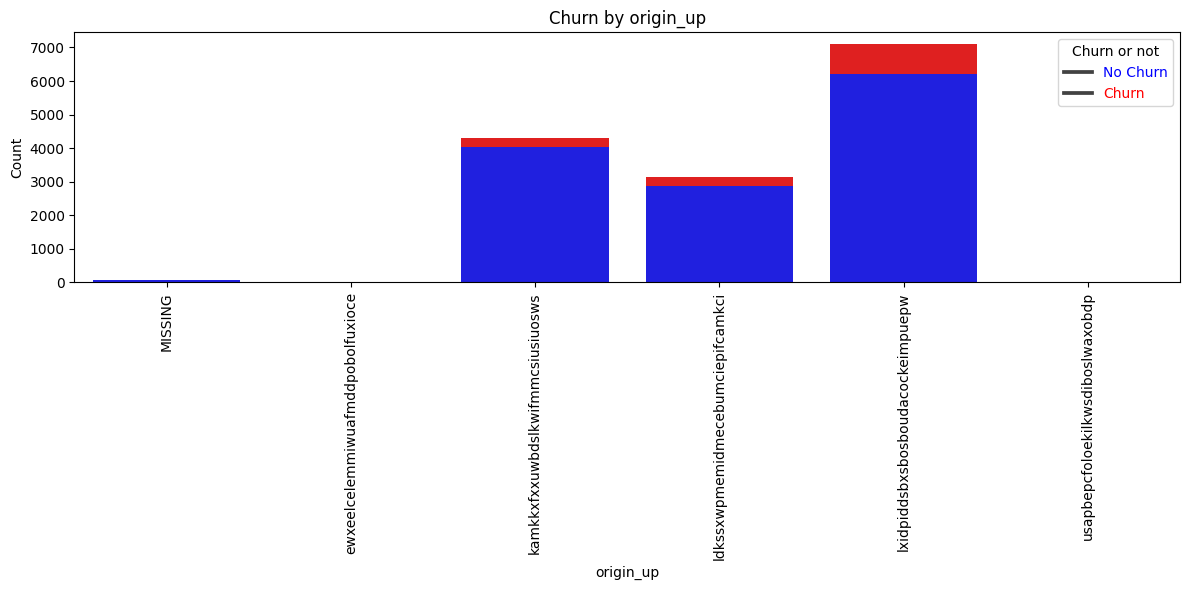

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_churn_pivot.index, y=origin_churn_pivot[0], color='b', label='Churn 0')
sns.barplot(x=origin_churn_pivot.index, y=origin_churn_pivot[1], color='r', bottom=origin_churn_pivot[0], label='Churn 1')
plt.xlabel('origin_up')
plt.ylabel('Count')
plt.title('Churn by origin_up')
plt.xticks(rotation=90)
legend = plt.legend(title='Churn or not', loc='upper right', labels=['No Churn', 'Churn'])
legend.get_texts()[0].set_color('blue')  
legend.get_texts()[1].set_color('red')  
plt.tight_layout()
plt.show()


Category "kamkkxfxxuwbdslkwifmmcsiusiuosws": There are 4,036 customers who did not churn and 258 customers who churned from this campaign. This campaign successfully attracted many customers, but there is still room to improve retention strategies to reduce the churn rate.

Category "lxidpiddsbxsbosboudacockeimpuepw": This campaign has a more significant number of churning customers (893) compared to other categories. The company needs to reevaluate marketing and retention strategies to enhance customer loyalty from this campaign.

Business recommendation for customers from the "ldkssxwpmemidmecebumciepifcamkci" category is to increase interactions with customers, provide better services, and offer attractive additional packages.